# Zadania klasyfikacji - perceptron, regresja logistyczna


Proszę nie używać dostępnych w bibliotekach klasyfikatorów.


## plot_decision_regions

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

        # konfiguruje generator znaczników i mapę kolorów
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # rysuje wykres powierzchni decyzyjnej
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        # rysuje wykres wszystkich próbek
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


## 1. Używając perceptronów napisz klasyfikator wielo-klasowy (klasyfikujący 3 lub więcej klas). Dla każdej z klas użyj klasyfikatora binarnego. Przykład klasyfikatora binarnego znajduje się poniżej.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

class Perceptron(object):

    # Konstruktor, podajemy współczynik uczenia sie oraz ilość epok
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1+ X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update *xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/kv/s9l8zj153pz4kzhq1rjwl_q80000gn/T/ipykernel_38926/2382359667.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx

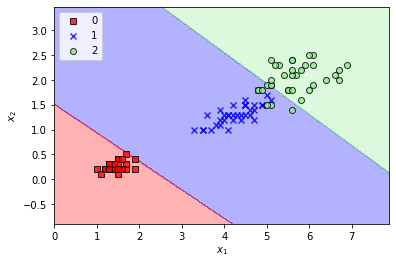

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
# podział danych na testowe i treningowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


# selekcja danych z klas 0 i 1
X_train_01 = np.copy(X_train)
y_train_01 = np.copy(y_train)
X_train_02 = np.copy(X_train)
y_train_02 = np.copy(y_train)

# w perceptronie wyjście jest albo 1 albo -1    
y_train_01[(y_train != 0)] = -1
y_train_01[(y_train == 0)] = 1
y_train_02[(y_train == 2)] = -1
y_train_02[(y_train != 2)] = 1

ppn1 = Perceptron(eta=0.1, n_iter=400)
ppn2 = Perceptron(eta=0.1, n_iter=400)
# uczenie modelu
ppn1.fit(X_train_01, y_train_01)
ppn2.fit(X_train_02, y_train_02)

class ChainedPerceptron:
    def __init__(self, ppn1, ppn2):
        self.ppn1 = ppn1
        self.ppn2 = ppn2

    def predict(self, X):
        pred1 = self.ppn1.predict(X)
        pred2 = self.ppn2.predict(X)
        pred1[pred1 == 1] = 0
        pred1[pred1 == -1] = 1
        pred2[pred2 == 1] = 0
        pred2[pred2 == -1] = 1
        return pred1 + pred2

# wyświetla wykres
plot_decision_regions(X=X_train, y=y_train, classifier=ChainedPerceptron(ppn1, ppn2))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.show()

## 2. Napisz klasyfikator wielo-klasowy przy użyciu regresji logistycznej. Dla każdej z klas użyj klasyfikatora binarnego. Przykład regresji logistycznej dla przypadku dwuklasowego znajduje się poniżej.

In [4]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

/var/folders/kv/s9l8zj153pz4kzhq1rjwl_q80000gn/T/ipykernel_38926/2911648234.py:24: RuntimeWarning: divide by zero encountered in log
  cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/kv/s9l8zj153pz4kzhq1rjwl_q80000gn/T/ipykernel_38926/2382359667.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker 

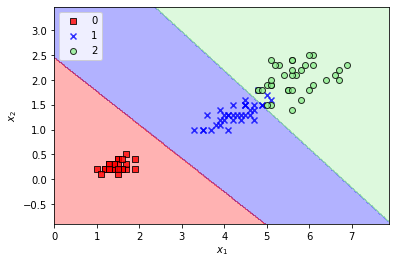

In [5]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


# selekcja danych z klas 0 i 1
X_train_01 = np.copy(X_train)
y_train_01 = np.copy(y_train)
X_train_02 = np.copy(X_train)
y_train_02 = np.copy(y_train)

# w perceptronie wyjście jest albo 1 albo -1
y_train_01[(y_train != 0)] = 1
y_train_02[(y_train == 2)] = 1
y_train_02[(y_train != 2)] = 0

lrgd1 = LogisticRegressionGD(eta=0.05, n_iter=10000, random_state=1)
lrgd2 = LogisticRegressionGD(eta=0.05, n_iter=10000, random_state=1)
# uczenie modelu
lrgd1.fit(X_train_01, y_train_01)
lrgd2.fit(X_train_02, y_train_02)

class ChainedLR:
    def __init__(self, lrgd1, lrgd2):
        self.lrgd1 = lrgd1
        self.lrgd2 = lrgd2

    def predict(self, X):
        pred1 = self.lrgd1.predict(X)
        pred2 = self.lrgd2.predict(X)
        return pred1 + pred2

plot_decision_regions(X=X_train_01, y=y_train, classifier=ChainedLR(lrgd1, lrgd2))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.show()

## 3. Dla regresji logistycznej napisz metodę wypisującą prawdopodobieństwo przynależności próbki (próbek) do danej klasy (klas).

In [7]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


# selekcja danych z klas 0 i 1
X_train_01 = np.copy(X_train)
y_train_01 = np.copy(y_train)
X_train_02 = np.copy(X_train)
y_train_02 = np.copy(y_train)

# w perceptronie wyjście jest albo 1 albo -1
y_train_01[(y_train != 0)] = 1
y_train_02[(y_train == 2)] = 1
y_train_02[(y_train != 2)] = 0

lrgd1 = LogisticRegressionGD(eta=0.05, n_iter=10000, random_state=1)
lrgd2 = LogisticRegressionGD(eta=0.05, n_iter=10000, random_state=1)
# uczenie modelu
lrgd1.fit(X_train_01, y_train_01)
lrgd2.fit(X_train_02, y_train_02)
#w regresji logarytmicznej wyjście przyjmuje wartości 0 lub 1 (prawdopodobieństwa)

def get_probs(X):
    net1 = lrgd1.net_input(X)
    net2 = lrgd2.net_input(X)
    net1_norm = lrgd1.activation(net1)
    net2_norm = lrgd2.activation(net2)
    return np.round(
        np.array([
            1 - net1_norm,
            np.abs(net1_norm - net2_norm),
            net2_norm,
            ChainedLR(lrgd1, lrgd2).predict(X)
        ]),
        4
    ).T

get_probs(X_train)


/var/folders/kv/s9l8zj153pz4kzhq1rjwl_q80000gn/T/ipykernel_38926/2911648234.py:24: RuntimeWarning: divide by zero encountered in log
  cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))


array([[9.999e-01, 1.000e-04, 0.000e+00, 0.000e+00],
       [9.997e-01, 3.000e-04, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00],
       [0.000e+00, 9.989e-01, 1.100e-03, 1.000e+00],
       [2.900e-03, 9.971e-01, 0.000e+00, 1.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 9.992e-01, 8.000e-04, 1.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00],
       [0.000e+00, 1.000e-04, 9.999e-01, 2.000e+00],
       [9.993e-01, 7.000e-04, 0.000e+00, 0.000e+00],
       [1.000e-03, 9.990e-01, 0.000e+00, 1.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, 1.000

# Program